In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sns.set()
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv("3.01.+Country+clusters.csv")
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


# Plot the Data

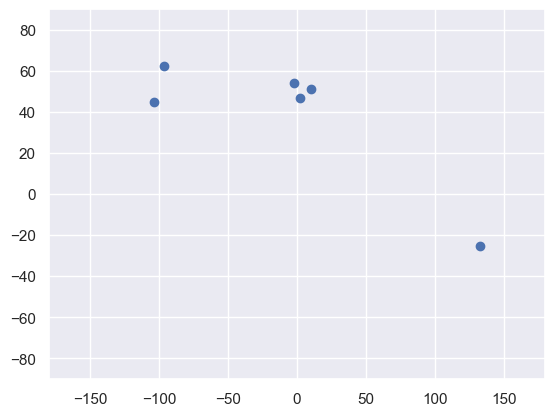

In [8]:
plt.scatter(data["Longitude"], data["Latitude"])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

# Select the Features

In [10]:
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


# Clustering

In [12]:
kmeans = KMeans(2) # we want to 2 cluster, that's why the input is 2

In [13]:
kmeans.fit(x)

T:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
T:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

# Clustering Results

- #### fit_predicts(x) returns the cluster predictions in an array

In [16]:
identifed_clusters = kmeans.fit_predict(x)
identifed_clusters

T:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
T:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 1])

In [17]:
data_with_clusters = data.copy()
data_with_clusters["Cluster"] = identifed_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


# Plot the New Data

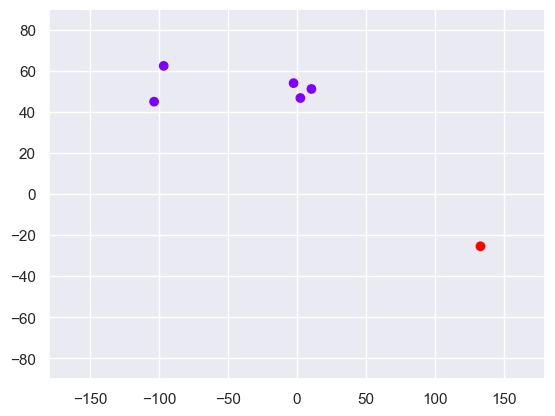

In [18]:
# Noktalar için küme sayısı kadar renk olmasını belirttik. 
plt.scatter(data_with_clusters["Longitude"], data_with_clusters["Latitude"], c=data_with_clusters["Cluster"], cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# KMeans with 3 Clusters

In [19]:
new_kmeans = KMeans(3)
new_kmeans.fit(x)

T:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
T:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
new_clusters = new_kmeans.fit_predict(x)
new_clusters

T:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
T:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 0, 1])

In [22]:
dt = data.copy()
dt["ClustersWith3"] = new_clusters
dt

,Country,Latitude,Longitude,Language,ClustersWith3
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


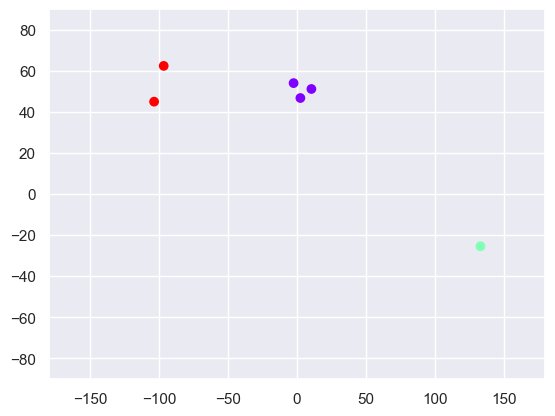

In [23]:
plt.scatter(dt["Longitude"], dt["Latitude"], c=dt["ClustersWith3"], cmap="rainbow")
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.show()